In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('kddcup.data_10_percent_corrected')

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# replace category columns with numerical values
df['protocol_type'] = le.fit_transform(df['protocol_type'])
df['service'] = le.fit_transform(df['service'])
df['flag'] = le.fit_transform(df['flag'])

df.var()

duration                       5.009051e+05
protocol_type                  3.313217e-01
service                        1.832864e+02
flag                           5.066341e+00
src_bytes                      9.765750e+11
dst_bytes                      1.091642e+09
land                           4.453063e-05
wrong_fragment                 1.817245e-02
urgent                         3.036294e-05
hot                            6.116844e-01
num_failed_logins              2.408579e-04
logged_in                      1.262699e-01
num_compromised                3.233977e+00
root_shell                     1.113191e-04
su_attempted                   6.072496e-05
num_root                       4.051035e+00
num_ile_creations              9.296022e-03
num_shells                     1.214406e-04
num_access_files               1.330914e-03
num_outbound_cmds              0.000000e+00
is_host_login                  0.000000e+00
is_guest_login                 1.384661e-03
count                          4

In [4]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values #features are all but last column
y = df.iloc[:, 41].values #label is last column

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [5]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [6]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9997436018541634


In [7]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=list(df.columns)[:-1]).sort_values(ascending=False)
feature_imp

count                          1.581644e-01
srv_count                      1.013673e-01
src_bytes                      9.809335e-02
dst_host_same_src_port_rate    8.533584e-02
same_srvrate                   7.845746e-02
protocol_type                  7.615624e-02
service                        7.456948e-02
diff_srv_rate                  4.566990e-02
dst_host_diff_srv_rate         4.245020e-02
dst_host_same_srv_rate         4.183164e-02
dst_host_srv_count             3.732512e-02
flag                           2.948910e-02
dst_host_serror_rate           2.122015e-02
dst_host_count                 2.075172e-02
dst_bytes                      1.825834e-02
dst_host_srv_serror_rate       1.659297e-02
serror_rate                    9.724828e-03
dst_host_srv_diff_host_ate     8.197403e-03
srv_diff_host_rate             5.100629e-03
logged_in                      4.818080e-03
dst_host_rerror_rate           4.074079e-03
hot                            3.423749e-03
rerror_rate                    3

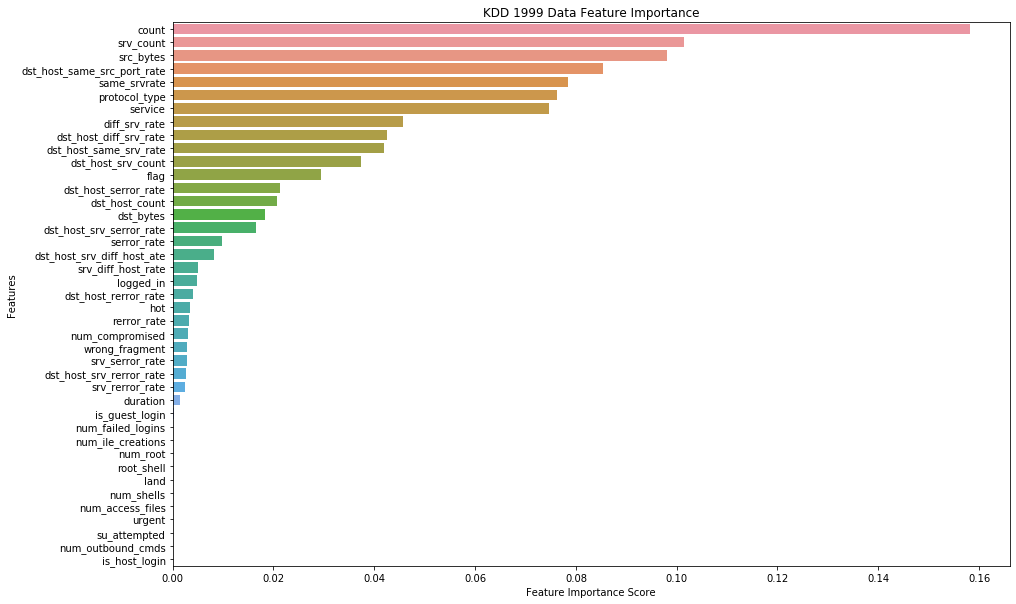

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)

fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("KDD 1999 Data Feature Importance")
plt.show()